**ASSIGNMENT FOR CLASSIFICATION**

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
#importing the dataset
data=pd.read_csv('/content/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [128]:
data.describe().T # analysing the dataset

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [129]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [130]:
# Eventhough there is no NaN some columns have zeros which are to be considered as NaN, so finding the sum of zeros in each column
(data==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [131]:
data['Outcome'].unique()

array([1, 0])

Since 'outcome' is the target column and only contains 0 and 1, can be opted out. Also column 'Pregnancies' contains zero which maybe a true value and hence also opted out. No zeros in column 'DiabetesPedigreeFunction', 'Age'.In all other columns zeros are replaced by NaN for easy handling

In [132]:
data_copy= data.copy(deep = True)
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [133]:
(data_copy==0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [134]:
data_copy.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

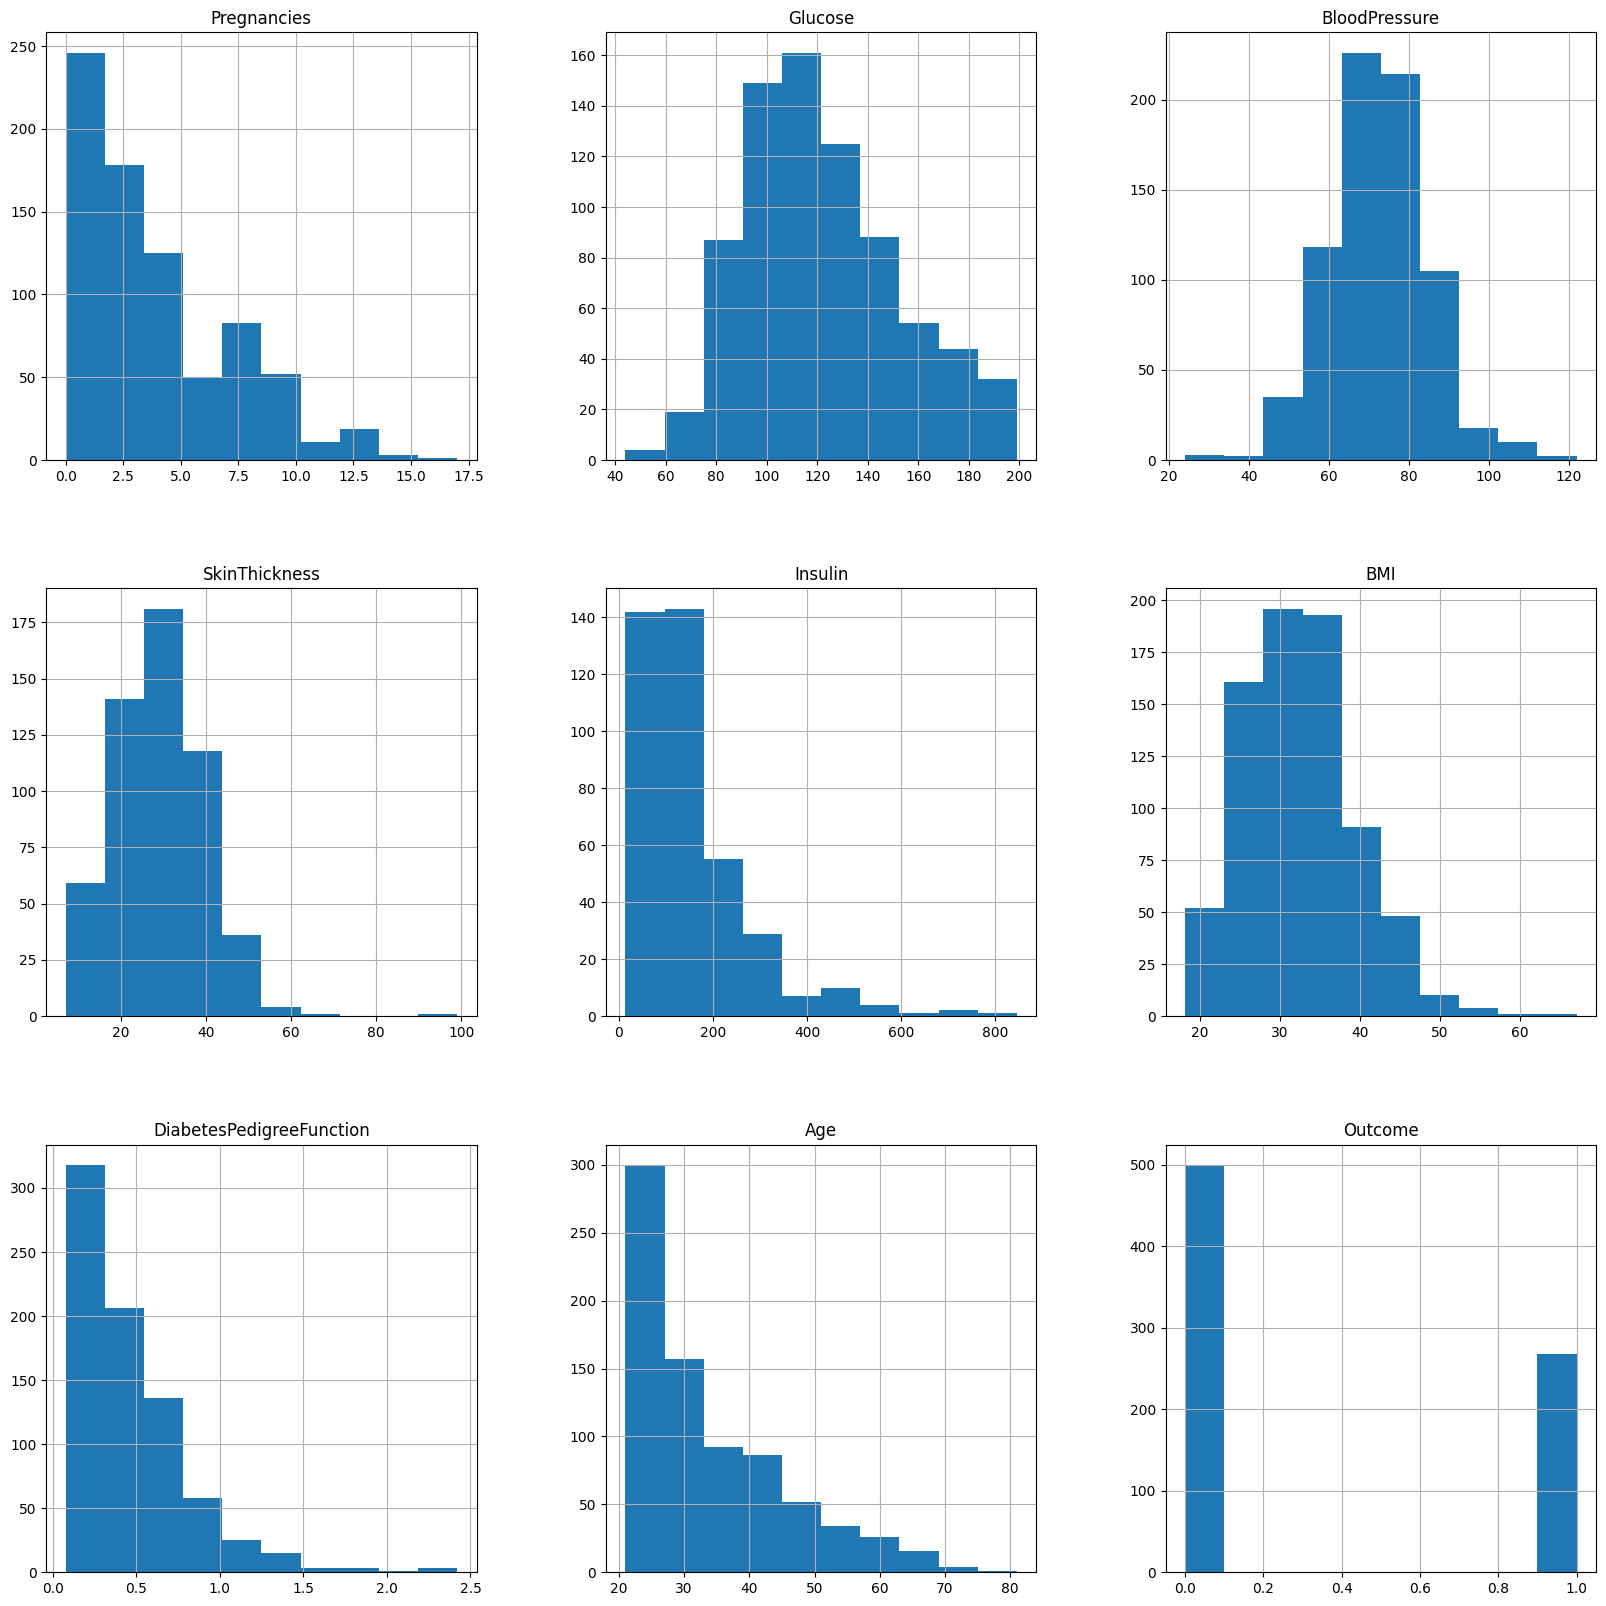

In [135]:
plots= data_copy.hist(figsize = (20,20))

In [136]:
#Replacing NaN by median
data_copy['Glucose'].fillna(data_copy['Glucose'].median(), inplace = True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].median(), inplace = True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median(), inplace = True)
data_copy['Insulin'].fillna(data_copy['Insulin'].median(), inplace = True)
data_copy['BMI'].fillna(data_copy['BMI'].median(), inplace = True)

In [137]:
data_copy.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

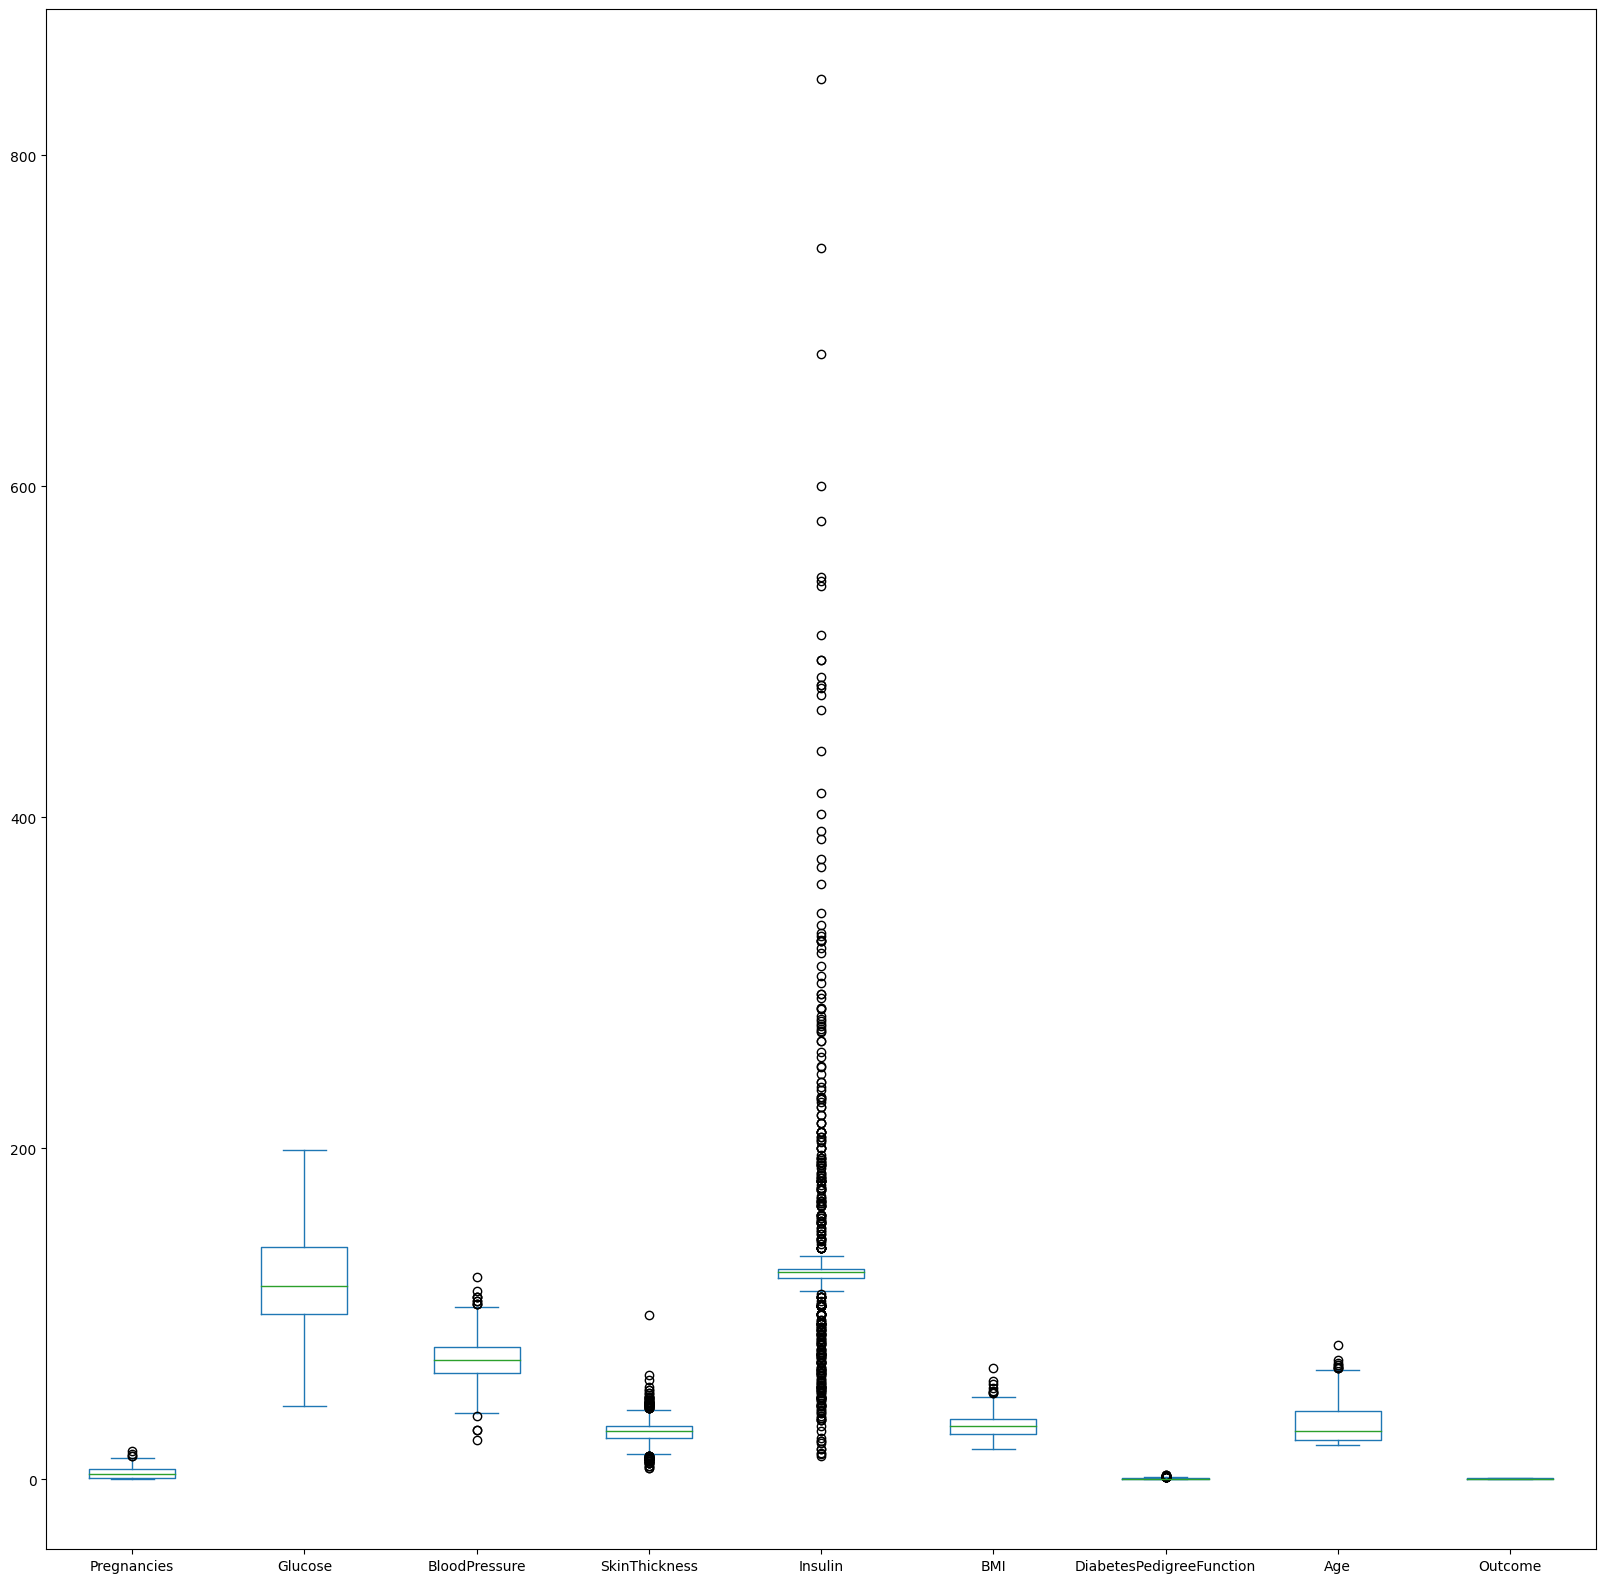

In [138]:
data_copy.plot(kind='box',figsize=(20,20)) #outliers are not handled since the features like insulin have unique values

In [139]:
data_copy.corr() # for finding the correlation, correlation=0 is not present better correlation between Age-Pregnencies, BMI-Skinthickness

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


<Axes: >

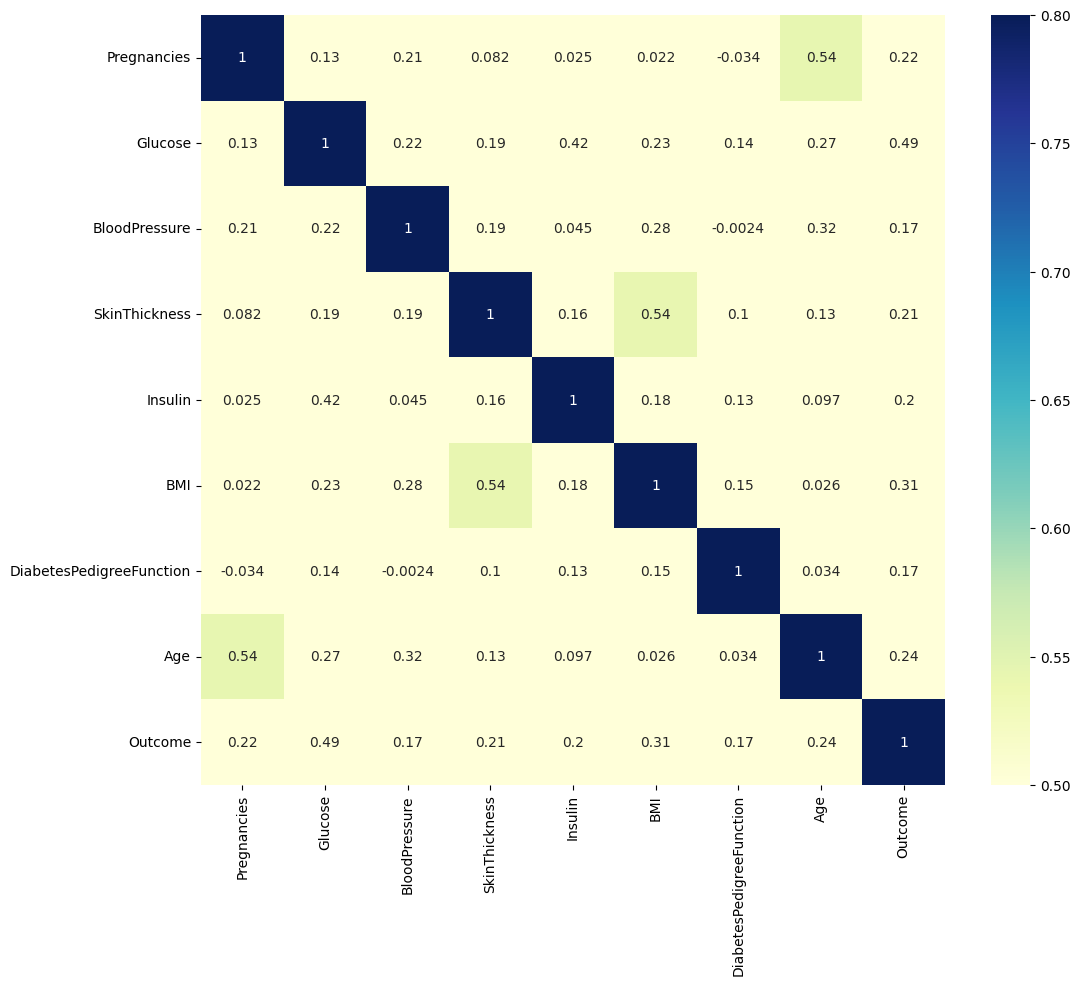

In [140]:
# plotting the heatmap
corrmatrix=data_copy.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corrmatrix,annot=True,vmin=0.5,vmax=0.8,cmap='YlGnBu')

In [141]:
data_copy.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Scaling the data using StandardScaler

In [142]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_copy.loc[:,['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]=sc.fit_transform(data_copy[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']])

In [143]:
#seperating the target column
x=data_copy.drop('Outcome',axis='columns')
y=data_copy['Outcome']

In [144]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [145]:
# using Naive Bayes classification
from sklearn.naive_bayes import GaussianNB
modelNB=GaussianNB()
modelNB.fit(x_train,y_train)

GaussianNB()

In [146]:
y_pred=modelNB.predict(x_test)

In [147]:
from sklearn.metrics import accuracy_score
print('Accuracy is :',accuracy_score(y_test,y_pred))

Accuracy is : 0.7532467532467533


In [148]:
# using SVM classifier
from sklearn.svm import SVC
metric_k=[]
svm_types=['linear','rbf','poly']
for s in svm_types:
  svmclf=SVC(kernel=s)
  svmclf.fit(x_train,y_train)
  y_pred_svm=svmclf.predict(x_test)
  acc=accuracy_score(y_test,y_pred_svm)
  metric_k.append(acc)
print(metric_k)

[0.7532467532467533, 0.7467532467532467, 0.7402597402597403]


In [149]:
#accuracy is more for kernel 'linear'
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train)
y_pred_svm=svmclf.predict(x_test)
print('Accuracy is :',accuracy_score(y_test,y_pred_svm))

Accuracy is : 0.7532467532467533


In [150]:
# using kNN classifier
from sklearn.neighbors import KNeighborsClassifier
metric_2 = []
neighbours = np.arange(3,15)
for c in neighbours:
  knn_clf = KNeighborsClassifier(n_neighbors= c, metric='minkowski', p=2)
  knn_clf.fit(x_train, y_train)
  y_pred_knn= knn_clf.predict(x_test)
  acc=accuracy_score(y_test,y_pred_knn)
  metric_2.append(acc)
print(metric_2)

[0.7077922077922078, 0.7207792207792207, 0.7337662337662337, 0.7142857142857143, 0.7142857142857143, 0.7337662337662337, 0.7272727272727273, 0.7597402597402597, 0.7597402597402597, 0.7727272727272727, 0.7597402597402597, 0.7727272727272727]


In [151]:
max(metric_2)

0.7727272727272727

In [152]:
#accuracy is more for k-value=14
knn_clf = KNeighborsClassifier(n_neighbors= 14, metric='minkowski', p=2)
knn_clf.fit(x_train, y_train)
y_pred_knn= knn_clf.predict(x_test)
print('Accuracy is :',accuracy_score(y_test,y_pred_knn))

Accuracy is : 0.7727272727272727


In [153]:
# using logistic regression
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred_log=log_reg.predict(x_test)
print('Accuracy is :',accuracy_score(y_test,y_pred_log))

Accuracy is : 0.7532467532467533


**Final outcome:**

Naive Bayes         :  0.7532467532467533
kNN (k=14)          :  0.7727272727272727
SVM (kernel=linear) :  0.7532467532467533
logistic regression :  0.7532467532467533
**So kNN classifier has better accuracy**